# Forecast Scheduling - WellsGroup Classes

`WellsGroup` class in the one on top of the others. You can specify a group of `Well` instances that, as seen before, each of them can be groups of scenarios and periods. 

`WellsGroup` has different functionality when evaluating it. Each `Well` part of this have n scenarios which are independent to each other, so if you would like to evaluate all scenarios in all wells you would have to sample one scenario per well and build all the possible combinations. To do this, `Dcapy` uses the functions of [PyDOE2](https://github.com/clicumu/pyDOE2) to generate factorial designs either full-factorial (fullfact) or Generalized Subset Designs (gds). 

On the other hand, in this notebook is applied another convinient way of creating a dca model, which is by providing a yml file. 



In [1]:
import pandas as pd 
import numpy as np 
from dcapy import dca
from dcapy.schedule import Well, Period, Scenario, WellsGroup,  model_from_dict
from dcapy.cashflow import CashFlowParams, CashFlow
from dcapy.wiener import Brownian, GeometricBrownian, MeanReversion
import seaborn as sns 
from datetime import date
import matplotlib.pyplot as plt
import copy
import yaml
import json
from scipy import stats

In a file called `YML_example1.yml` is a WellsGroup case where are defined 6 wells. Four of them have one scenario and others two have two scenarios with two Periods. 

```yaml
name: fdp_field
wells:
  DC2:
    name: DC2
    scenarios:
      base:
        name: base
        periods:
          pdp:
            dca:
              bsw: 0.9783
              fluid_rate: 5192.343117182031
              slope: 3.986053847389352e-05
              ti: '2021-04-01'
            end: '2030-12-31'
            freq_input: D
            freq_output: D
            name: pdp
            start: '2021-04-01'
            rate_limit: 50
            cashflow_params:
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
  DC3:
    name: DC3
    scenarios:
      base:
        name: base
        periods:
          pdp:
            dca:
              bsw: 0.8935
              fluid_rate: 3101.6068269182692
              slope: 1.1341265851141962e-05
              ti: '2021-04-01'
            end: '2030-12-31'
            freq_input: D
            freq_output: D
            name: pdp
            start: '2021-04-01'
            rate_limit: 50
            cashflow_params:
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
  DC4:
    name: DC4
    scenarios:
      base:
        name: base
        periods:
          pdp:
            dca:
              bsw: 0.9863
              fluid_rate: 7304.560639994402
              slope: 4.086888672335466e-05
              ti: '2021-04-01'
            end: '2030-12-31'
            freq_input: D
            freq_output: D
            name: pdp
            start: '2021-04-01'
            rate_limit: 50
            cashflow_params:
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
  DC5:
    name: DC5
    scenarios:
      base:
        name: base
        periods:
          pdp:
            dca:
              bsw: 0.9648
              fluid_rate: 5710.712047244095
              slope: 1.9260822570459275e-05
              ti: '2021-04-01'
            end: '2030-12-31'
            freq_input: D
            freq_output: D
            name: pdp
            start: '2020-04-01'
            rate_limit: 50
            cashflow_params:
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
  well-1:
    name: well-1
    scenarios:
      highfr:
        name: highfr
        periods:
          fm1:
            cashflow_params:
            - name: capex
              periods: 1
              target: capex
              value: -4000000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 6500.0
              slope:
              - 3.0e-05
              ti: '2022-01-01'
            end: '2027-01-01'
            name: fm1
            rate_limit: 200.0
            start: '2022-01-01'
          fm2:
            cashflow_params:
            - name: capex_wo
              periods: 1
              target: capex
              value: -600000.0
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 6500.0
              slope:
              - 5.0e-05
              ti: '2022-01-01'
            depends:
              period: fm1
            end: '2030-01-01'
            name: fm2
            start: '2022-01-01'
      mediumfr:
        name: mediumfr
        periods:
          fm1:
            cashflow_params:
            - name: capex_drill
              periods: 1
              target: capex
              value: -4000000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 3500.0
              slope:
              - 3.0e-06
              ti: '2022-01-01'
            end: '2030-01-01'
            name: fm1
            rate_limit: 200.0
            start: '2022-01-01'
          fm2:
            cashflow_params:
            - name: capex_wo
              periods: 1
              target: capex
              value: -600000.0
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 2500.0
              slope:
              - 5.0e-06
              ti: '2022-01-01'
            depends:
              period: fm1
            end: '2030-01-01'
            name: fm2
            start: '2022-01-01'
  well-2:
    name: well-2
    scenarios:
      highfr:
        name: highfr
        periods:
          fm2:
            cashflow_params:
            - name: capex_drill
              periods: 1
              target: capex
              value: -4000000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 6500.0
              slope:
              - 5.0e-05
              ti: '2022-01-01'
            end: '2030-01-01'
            name: fm2
            rate_limit: 200.0
            start: '2022-01-01'
          fm1:
            cashflow_params:
            - name: capex_wo
              periods: 1
              target: capex
              value: -600000.0
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 6500.0
              slope:
              - 3.0e-05
              ti: '2022-01-01'
            depends:
              period: fm2
            end: '2030-01-01'
            name: fm1
            start: '2022-01-01'
      mediumfr:
        name: mediumfr
        periods:
          fm2:
            cashflow_params:
            - name: capex_drill
              periods: 1
              target: capex
              value: -4000000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 2500.0
              slope:
              - 5.0e-06
              ti: '2022-01-01'
            end: '2030-01-01'
            name: fm2
            rate_limit: 200.0
            start: '2022-01-01'
          fm1:
            cashflow_params:
            - name: capex_wo
              periods: 1
              target: capex
              value: -600000.0
            - name: capex_abandon
              periods: -1
              target: capex
              value: -200000.0
            dca:
              bsw:
                dist: uniform
                kw:
                  loc: 0.4
                  scale: 0.4
              fluid_rate: 3500.0
              slope:
              - 3.0e-06
              ti: '2022-01-01'
            depends:
              period: fm2
            end: '2030-01-01'
            name: fm1
            start: '2022-01-01'
cashflow_params:
- name: fix_opex
  target: opex
  value: -11000.
  freq_value: 'M'
- iter: 1
  multiply: oil_volume
  name: var_opex
  target: opex
  value: -8.0
- multiply: oil_volume
  name: income
  target: income
  value: 
    initial_condition: 60 
    ti: '2021-04-01'
    steps: 11
    generator:
      dist: norm
      kw:
        loc: 0.
        scale: 13.13
    m: 46.77
    eta: 0.112653 
    freq_input: A
  wi: 0.92
- name: buy
  periods: 1
  target: capex
  value: -15500000
  general: True
seed: 21
```

By using a YML parser like [PyYAML](https://pyyaml.org/]) you can convery a *.yml file into a python dictionary.

In [2]:
with open('YML_example1.yml','r') as file:
    case_dict = yaml.load(file)

<ipython-input-2-33d4e64ac547>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  case_dict = yaml.load(file)


The resulting dictionary, if it has valid values for key arguments, can be passed to a `WellsGroup` directly as made before on the others Schedule Classes

In [3]:
case = WellsGroup(**case_dict)

print(type(case))

<class 'dcapy.schedule.schedule.WellsGroup'>


`WellsGroup` has a method to make the all the factorial combinations of wells scenarios. By calling it with no arguments it creates a full-factorial combinations.

In [4]:
sc = case.scenarios_maker()
sc

[{'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['highfr']},
 {'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['highfr']},
 {'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['mediumfr']},
 {'DC2': ['base'],
  'DC3': ['base'],
  'DC4': ['base'],
  'DC5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['mediumfr']}]

When the reduced key argument is set, it triggers the Generalized Subset Designed (GSD) (Well explained on [PyDOE2](https://github.com/clicumu/pyDOE2) Documentation).  

### Generate Forecast. 

Those scenarios are a list of dictionary ready to be passed to `generate_forecast` method.

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

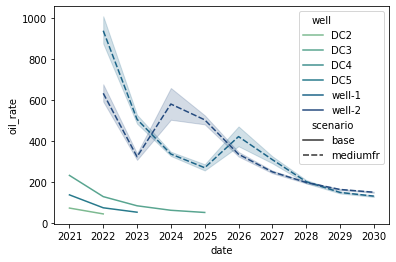

In [5]:
fwn= case.generate_forecast(wells=sc[3],freq_output='A',iter=50, seed=21)

#fwn
sns.lineplot(data=fwn, x=fwn.index.to_timestamp(), y='oil_rate', hue='well',style='scenario',palette='crest')


### Generate Cashflow

Once a forecast is generated the `generate_cashflow` method can be called

In [6]:
#cwn= lp.generate_cashflow(wells={'well-1':['mediumfr'],'well-2':['mediumfr']},freq_output='A')
cwn= case.generate_cashflow(wells=sc[3],freq_output='A')
print(len(cwn))

50


Notice that the resulting cashflow for the third scenario is a list of 50 `CashflowModel` due to the `iter` key argument was set with this number. What it does is to generate 50 samples of the probabilistic varibales if they exist in the scenarios and broadcast results with the scenarios that does not have any probabilistic variables. 

Let's see the first cashflow model

In [23]:
fcf_0= cwn[30].fcf()

#Show cashflows in Millons of dollars
fcf_0.multiply(1e-6).round(2)

,income_fdp_field-DC2-base-pdp,income_fdp_field-DC3-base-pdp,income_fdp_field-DC4-base-pdp,income_fdp_field-DC5-base-pdp,income_fdp_field-well-1-mediumfr-fm1,income_fdp_field-well-1-mediumfr-fm2,income_fdp_field-well-2-mediumfr-fm2,income_fdp_field-well-2-mediumfr-fm1,total_income,fix_opex_fdp_field-DC2-base-pdp,...,capex_drill_fdp_field-well-1-mediumfr-fm1,capex_wo_fdp_field-well-1-mediumfr-fm2,capex_abandon_fdp_field-well-1-mediumfr-fm2,capex_drill_fdp_field-well-2-mediumfr-fm2,capex_wo_fdp_field-well-2-mediumfr-fm1,capex_abandon_fdp_field-well-2-mediumfr-fm1,buy,total_capex,fcf,cum_fcf
2021,1.12,3.53,0.95,2.09,0.00,0.00,0.00,0.00,7.69,-0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,-15.5,-15.7,-9.65,-9.65
2022,0.02,2.48,0.00,1.44,30.59,0.00,20.56,0.00,55.09,-0.13,...,-4.0,0.0,0.0,-4.0,0.0,0.0,0.0,-8.2,40.27,30.62
2023,0.00,1.99,0.00,0.53,18.09,0.00,11.29,0.00,31.90,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,28.19,58.81
2024,0.00,1.08,0.00,0.00,11.99,0.00,5.92,35.99,54.98,0.00,...,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,-0.6,48.86,107.67
2025,0.00,0.53,0.00,0.00,6.87,0.00,0.00,14.48,21.88,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,18.78,126.45
2026,0.00,0.00,0.00,0.00,4.20,20.77,0.00,10.07,35.04,0.00,...,0.0,-0.6,0.0,0.0,0.0,0.0,0.0,-0.6,30.34,156.79
2027,0.00,0.00,0.00,0.00,0.00,8.38,0.00,6.28,14.66,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.57,169.36
2028,0.00,0.00,0.00,0.00,0.00,4.40,0.00,4.10,8.50,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.97,176.33
2029,0.00,0.00,0.00,0.00,0.00,3.04,0.00,3.22,6.26,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.02,181.35
2030,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.0,0.0,-0.2,0.0,0.0,-0.2,0.0,-0.4,-0.66,180.69


Here there are two additional features in the Cashflow Parameter definition. 

1. If you cant to assign an additional Capex to the project that does not assigned to a single well but the case itself, for example a Purchase price, infraestructure investment, etc..., you can declare a `CashFlowParam` with the key argument `general` set to **True**. What it does is not to pass the cashflow parameter to each well instead make a *general* cashflow for the model. 

In [16]:
case.cashflow_params[3]

CashFlowParams(name='buy', wi=1.0, periods=1, value=-15500000.0, target='capex', multiply=None, agg='mean', depends=False, iter=1, general=True, freq_value=None)

2. The income cashflow_param is a Wiener Class, especifically a `MeanReversion` instance. In this case the Oil Price is modeled by the Mean Reversion Model which gives a different time series on each of the 50 iterations.

In [18]:
case.cashflow_params[2]

CashFlowParams(name='income', wi=0.92, periods=None, value=MeanReversion(initial_condition=60.0, ti=datetime.date(2021, 4, 1), steps=11, processes=1, generator=ProbVar(dist='norm', kw={'loc': 0.0, 'scale': 13.13}, factor=1.0, seed=None), freq_input='A', freq_output='D', m=46.77, eta=0.112653), target='income', multiply='oil_volume', agg='mean', depends=False, iter=1, general=False, freq_value=None)

The next plot shows what could be the oil price iterations for the 50 cases

<AxesSubplot:>

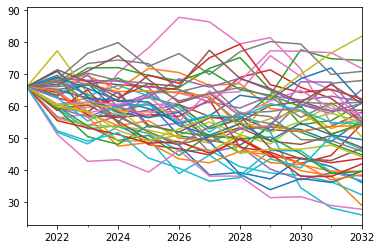

In [22]:
oil_price_model = MeanReversion(
    initial_condition = 66,
    ti = date(2021,1,1),
    generator = {'dist':'norm','kw':{'loc':0,'scale':5.13}},
    m=46.77,
    eta=0.112652,
    freq_input = 'A'
)
oil_price = oil_price_model.generate(12,50, freq_output='A', seed=21)

oil_price.plot(legend=False)

Get the Net present value for the 50 cases. Plot the distribution of the scenarios

0.1    23.561044
0.5    59.131838
0.9    95.542097
Name: npv, dtype: float64


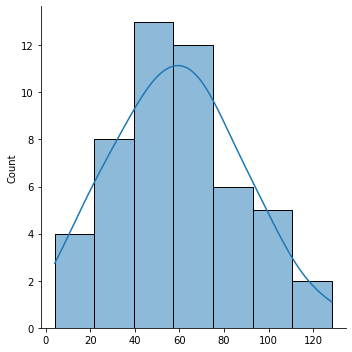

In [26]:
npv = case.npv([0.15], freq_rate='A', freq_cashflow='A')/1e6

print(npv['npv'].quantile([0.1,0.5,0.9]))

sns.displot(npv['npv'].values, kde=True)

Plot any of the cases

/home/scuervo/Documents/dev/apps/dcapy/dcapy/cashflow/cashflow.py:342: UserWarning: FixedFormatter should only be used together with FixedLocator
  grax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks])
/home/scuervo/Documents/dev/apps/dcapy/dcapy/cashflow/cashflow.py:350: UserWarning: FixedFormatter should only be used together with FixedLocator
  spax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks_cum])


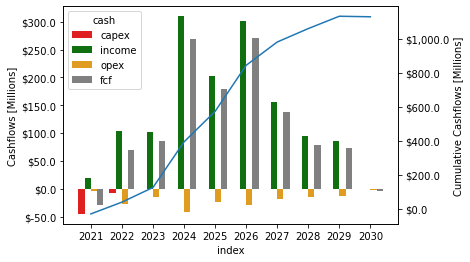

In [10]:
cwn[38].plot(cum=True,format='m')

In [28]:
with open('YML_example1.yml','r') as file:
    case_dict = yaml.load(file)

lp = WellsGroup(**case_dict)

<ipython-input-28-ebe3c98787ec>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  case_dict = yaml.load(file)


In [29]:
fwn= lp.generate_forecast(wells=sc[3],freq_output='A',iter=2, seed=21)

cwn= lp.generate_cashflow(wells=sc[3],freq_output='A')

In [30]:
cwn[0].fcf()['cum_fcf'].values

array([-9.65263710e+06,  2.09036981e+07,  4.34884735e+07,  7.09743677e+07,
        8.67308430e+07,  9.95260309e+07,  1.05163157e+08,  1.08640398e+08,
        1.13126400e+08,  1.12473869e+08])